In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df = df[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','EstimatedSalary', 'Exited' ]]

In [5]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [6]:

value_counts = df['Exited'].value_counts()
num_zeros = value_counts.get(0, 0)  # Get the count of 0, default to 0 if not found
num_ones = value_counts.get(1, 0)   # Get the count of 1, default to 0 if not found

print("Number of 0s:", num_zeros)
print("Number of 1s:", num_ones)

Number of 0s: 7963
Number of 1s: 2037


In [7]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [8]:
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)
X = min_max_normalized(X)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

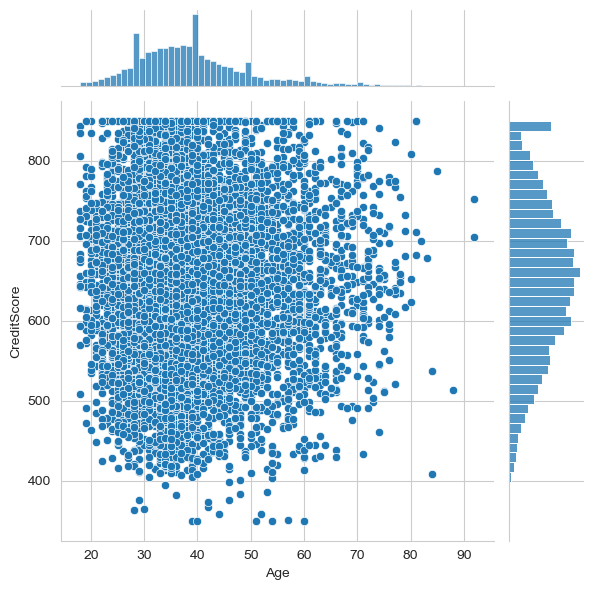

In [11]:
sns.jointplot(x='Age', y = 'CreditScore', data=df)

[Text(0.5, 1.0, 'Exited vs. Balance')]

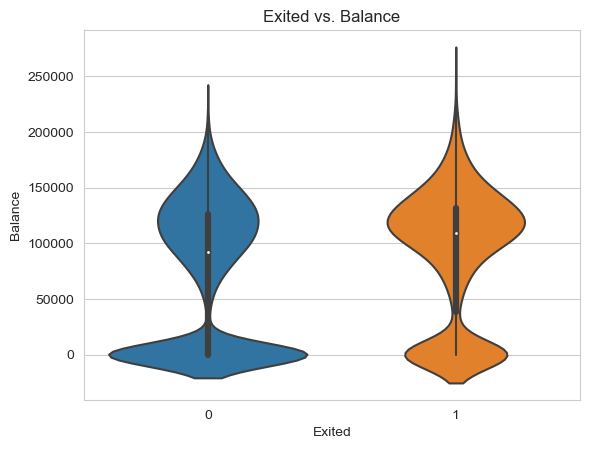

In [12]:
sns.violinplot(x='Exited', y='Balance', data=df) .set(title='Exited vs. Balance') 

[Text(0.5, 1.0, 'Exited vs. Age')]

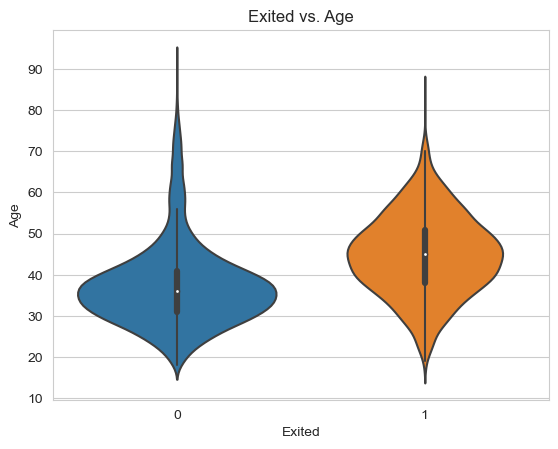

In [13]:
sns.violinplot(x ='Exited',y='Age', data=df).set(title='Exited vs. Age')

Text(0, 0.5, 'Count')

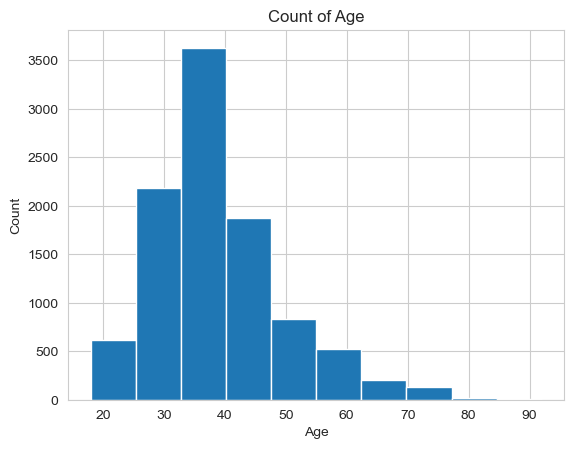

In [14]:
df['Age'].hist()
plt.title("Count of Age")
plt.xlabel('Age')
plt.ylabel('Count')

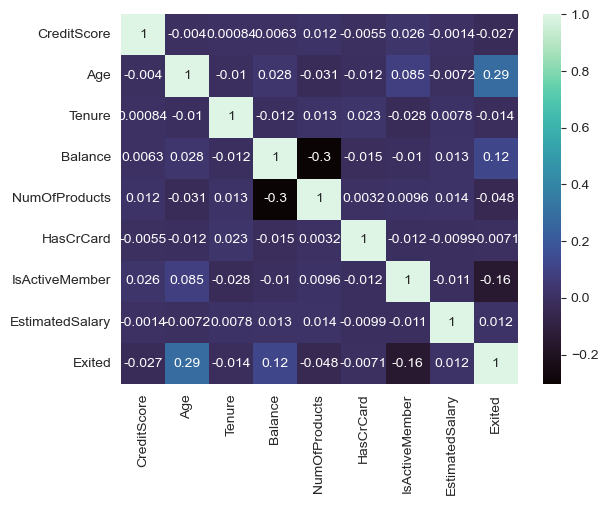

In [15]:
cv = sns.heatmap(df.corr(),  annot = True, cmap = 'mako')

# Logisitc Reg

In [16]:
lr = LogisticRegression()

In [17]:
lr.fit(X_train, y_train)

LogisticRegression()

In [18]:
pred = lr.predict(X_test)

In [19]:
accuracy_score(y_test, pred)

0.825

In [20]:
print(confusion_matrix(y_test, pred))

[[786  15]
 [160  39]]


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

In [24]:
clf = RandomForestClassifier(n_estimators=1000, oob_score= True, random_state=77, max_leaf_nodes=30)

In [25]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, oob_score=True,
                       random_state=77)

In [26]:
pred = clf.predict(X_test)

In [27]:
accuracy_score(y_test, pred)

0.849

In [28]:
print(confusion_matrix(y_test, pred))

[[779  22]
 [129  70]]


# SVM